2440004445 - Steven Matthew

2440019030 - Muhammad Farras Nayan 

2440021205 - Yeremia Sutanto Adi Pratama

In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/man-juu/datasetML/main/language_detection_dataset.csv")
data.head(10)

,Text,Language
0,oyama station was opened on april the statio...,English
1,elle est la fille de gérios tuéni et katbé sur...,French
2,"en participó en el video ""love machine"" donde...",Spanish
3,o rondonópolis e o goiás são os únicos times d...,Portuguese
4,immagino che non vorrebbe più pane d'oro adess...,Italian
5,мая года был назначен тренером вратарей сбор...,Russian
6,cerro wichu kkollu är ett berg i bolivia det l...,Swedish
7,ടെറി നിങ്ങൾ യഥാർത്ഥത്തിൽ ആ മാലാഖയെപ്പോലെയാണ് ക...,Malayalam
8,francisco de miranda is een gemeente in de ven...,Dutch
9,في أبريل م قدم الزعيم مصطفى النحاس مذكرة للسف...,Arabic


In [ ]:
data["Language"].value_counts()

English       901
French        901
Spanish       820
Portuguese    740
Italian       697
Russian       693
Swedish       677
Malayalam     594
Dutch         547
Arabic        537
Turkish       475
German        470
Tamil         469
Danish        428
Kannada       369
Greek         365
Chinese       301
Indonesian    301
Japanese      301
Korean        301
Hindi         113
Name: Language, dtype: int64

In [ ]:
X = data["Text"]
y = data["Language"]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

creating a list for appending the preprocessed text

In [ ]:
data_list = []
# iterating through all the text
for text in X:
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        # converting the text to lower case
        text = text.lower()
      
        #remove url
        text = re.sub('https*\S+' , ' ' , text)
        # appending to data_list
        data_list.append(text)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()
X.shape

(11000, 58874)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy is :",ac)
# Accuracy is : 0.9459
# Accuracy with extra preprocessing : 0.944

Accuracy is : 0.9395454545454546


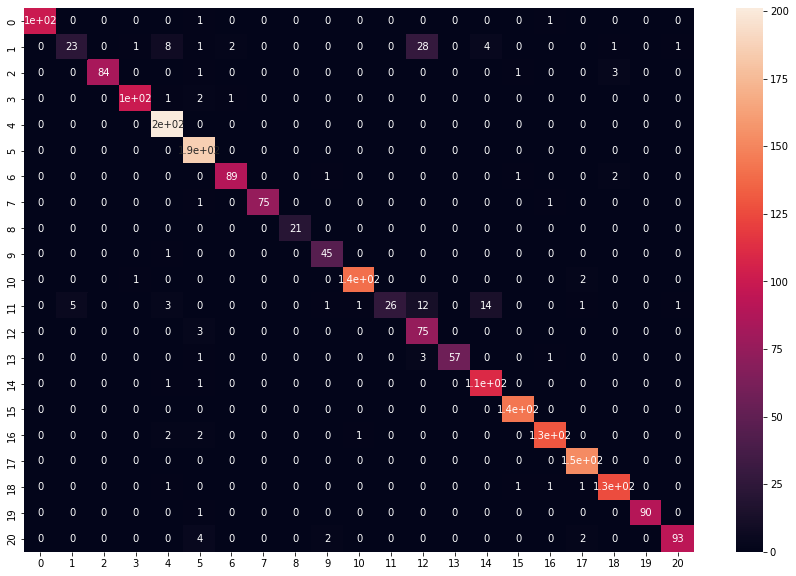

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [ ]:
def predict(text):
     x = cv.transform([text]).toarray() # converting text to bag of words model (Vector)
     lang = model.predict(x) # predicting the language
     lang = le.inverse_transform(lang) # finding the language corresponding the the predicted value
     print("The language is in",lang[0]) # printing the language

In [ ]:
predict("my name is steven")

The language is in English


In [ ]:
predict("اسمي هو استيفن")

The language is in Arabic


In [ ]:
predict("Mi nombre es Steven")

The language is in Spanish


In [ ]:
predict("mi chiamo steven")

The language is in Italian


In [ ]:
predict("Ini dimana? Siapa saya?")

The language is in Indonesian


In [ ]:
predict("ここはどこ?私は誰?")

The language is in Japanese


In [ ]:
predict("где это? кто я?")

The language is in Russian


In [ ]:
predict("यह कहां है? मैं कौन हूँ?")

The language is in Hindi


In [ ]:
predict("моје име је Виллиам")
# This is Serbian (not in dataset)

The language is in French


In [ ]:
print("=============================")
print("masukan kata")
text = input()
print("=============================")
print(" ")
print("The word inputed is", text)
detct = (predict(text))

masukan kata
이전 제품에서 온라인 플레이 기능을 비디오 게임 개발사에
 
The word inputed is 이전 제품에서 온라인 플레이 기능을 비디오 게임 개발사에
The language is in Korean
